This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/diabetes.csv")
print(df.shape)
# print head of data set
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
149,2,90,70,17,0,27.3,0.085,22
416,1,97,68,21,0,27.2,1.095,22
275,2,100,70,52,57,40.5,0.677,25
742,1,109,58,18,116,28.5,0.219,22
145,0,102,75,23,0,0.0,0.572,21
...,...,...,...,...,...,...,...,...
572,3,111,58,31,44,29.5,0.430,22
498,7,195,70,33,145,25.1,0.163,55
562,1,87,68,34,77,37.6,0.401,24
196,1,105,58,0,0,24.3,0.187,21


In [ ]:
#Evaluating Performance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[149  27]
 [ 34  44]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       176
           1       0.62      0.56      0.59        78

    accuracy                           0.76       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.75      0.76      0.76       254



=== All AUC Scores ===
[0.76962963 0.83333333 0.85481481 0.74555556 0.81148148 0.85037037
 0.86777778 0.91       0.80884615 0.83230769]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8284116809116808


In [ ]:
#The next thing is we will tune our hyperparameters(parameter whose value is set before the learning process begins) so that we can
#improve the performance of the model
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth}
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.9min finished


{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 500}


In [ ]:
#My results were: ‘n_estimators’ = 200; ‘max_features’ = ‘auto’; ‘max_depth’: 340.
#Now we can plug these back into the model to see if it improved our performance
rfc = RandomForestClassifier(n_estimators=400, max_depth=500, max_features='auto')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[148  28]
 [ 34  44]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       176
           1       0.61      0.56      0.59        78

    accuracy                           0.76       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.75      0.76      0.75       254



=== All AUC Scores ===
[0.78259259 0.83555556 0.83185185 0.72925926 0.82222222 0.86148148
 0.86851852 0.89703704 0.80884615 0.86538462]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8302749287749288


Our roc_auc score improved from 0.77 to 0.82. 
The downside is that our number of false positives increased slightly (but false negatives declined).

In [ ]:
A = rfc.predict([[1,97,68,21,0,27.2,1.95,22]])
A

array([0])

In [ ]:
##checking feature importance 
feature_importance = pd.DataFrame({'Features' :X.columns,
                                   'Importances':rfc.feature_importances_})
feature_importance

,Features,Importances
0,Pregnancies,0.084361
1,Glucose,0.269475
2,BloodPressure,0.081463
3,SkinThickness,0.073965
4,Insulin,0.075577
5,BMI,0.155468
6,DiabetesPedigreeFunction,0.117791
7,Age,0.141901


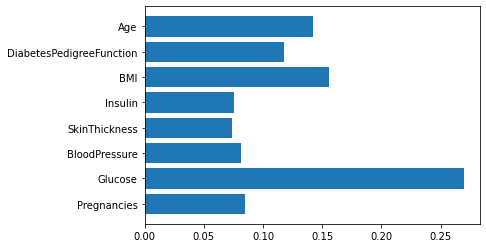

In [ ]:
import matplotlib.pyplot as plt
plt.barh(feature_importance['Features'],feature_importance['Importances'])
plt.show()

Unfortunately there's no easy graph to graph the "best"tree or an overall ensemble tree from your model(forest),you just need to take example u need to consider a specific estimator

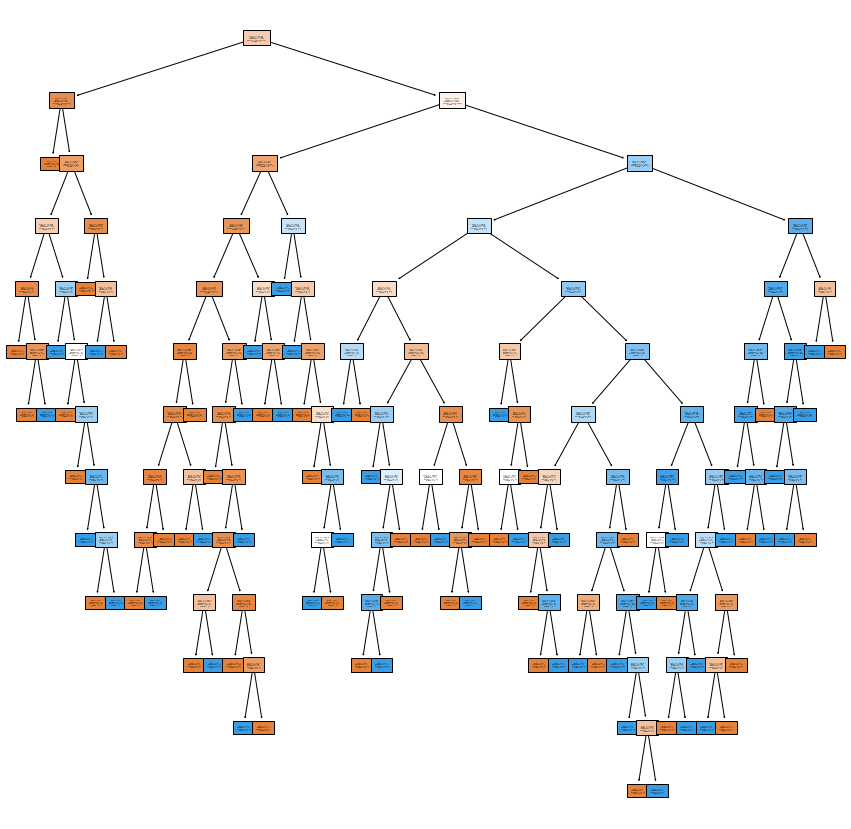

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size':10})
tree.plot_tree(rfc.estimators_[0],class_names=["0","1"],filled = True,fontsize=2)
plt.show()

export_graphviz function for display the tree within a jupyter notebook and it converts the decision tree into adot file

pydotplus converts the dotfile into png or pdf or displayable form on jupyter(colab)

In [ ]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = StringIO()
export_graphviz(rfc.estimators_[10],out_file = dot_data,filled = True,class_names=["0","1"],rounded=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph.write_pdf("tree.pdf")

True

The diversification in Machine Learning is achieved by a technique known as "Ensemble Learning".

A Voting Classifier (or a "majority vote ensemble")is an ensemble machine learning algorithm that combines predictions from the multiple models.It is a technique that may be used to improve the model performance,ideally by achieving better performance than a single model used in the ensemble


There are two approaches to the majority vote prediciton for classification -->Hard voting,-->Soft voting. Hardvoting involves summing the predictions for each class label and predicting the label with the most votes. Softvoting involves summing the predicted probabilities (probability like scores)for each class label and predicting the label with the largest probability.

Hardvoting is for models that predict class labels whereas softvoting is for models that predict the class membership probabilities.


In [ ]:
from sklearn.model_selection import GridSearchCV
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 200}


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#test the  models with the test data and print their accuracy scores
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

rf: 0.7480314960629921
log_reg: 0.7795275590551181


In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.7834645669291339

Boosting techniques employs the logic in which the subsequent predictors learn from the mistakes of the previous predictors.Therefore the observations have an unequal probability of appearing in sub.models and the ones with the highesterror rate appears most(So the observations are not chosen on the bootstrap process but based on the error).But we need to have a stopping criteria should be implemented so that it would not lead to overfitting on training data.

Thats where Gradient Boosting plays a key role,it is also known as Gradient Tree Boosting,Stochastic Gradient Boosting,Gradient Boosting Machines or GBM.

Gradient Boosting is a Machine Learning technique for regression and classification where it produces a prediction model in the form of an ensemble of weak prediction models typically Decision Trees.

The Gradient Boosting classifier mainly depends on loss function.A Custom loss function can be used and standardized the loss functions are supported by gradient boosting classifiers,but the loss function is not differentiable.

In order to implement the Gradient Boosting Classifer,we will need to carry the following steps:

-->Fit the Model -->Tune the model parameters and hyperparameters -->Make the predictions -->Interpret the results

In [ ]:
pip install pydataset

     |████████████████████████████████| 15.9MB 2.4MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-cp36-none-any.whl size=15939430 sha256=b235efeeec5efdb1f8571234f7f6f751c0b1c1b19f53f4e4a3678cc7615e97cd
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset


In [ ]:
from pydataset import data
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


Our goal will be to predict the status of patients (alive or dead) using the available independent variables. The steps we will use are as follows.

Data preparation
Baseline decision tree model
Hyperparameter tuning
Gradient boosting model development

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
from pydataset import data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
df=data('cancer')
df

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
224,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0
225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0
226,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0
227,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0


In [ ]:
df=data('cancer').dropna()
df

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
6,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0
9,1.0,218,2,53,1,1.0,70.0,80.0,825.0,16.0
10,7.0,166,2,61,1,2.0,70.0,70.0,271.0,34.0
11,6.0,170,2,57,1,1.0,80.0,80.0,1025.0,27.0
15,12.0,567,2,57,1,1.0,80.0,70.0,2600.0,60.0
17,22.0,613,2,70,1,1.0,90.0,100.0,1150.0,-5.0


In [ ]:
X=df[['time','sex','ph.karno','pat.karno','meal.cal','wt.loss']]
y=df['status'] 


The criteria for better in this situation is accuracy. Therefore, we will make a decision tree model, but we will manipulate the max depth of the tree to create 9 different baseline models. The best accuracy model will be the baseline model.



In [ ]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,10):
     tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
     if tree_classifier.fit(X,y).tree_.max_depth<depth:
         break
     score=np.mean(cross_val_score(tree_classifier,X,y,scoring='accuracy', cv=crossvalidation,n_jobs=1))
     print(depth, score)

1 0.71875
2 0.6477941176470589
3 0.6768382352941177
4 0.6698529411764707
5 0.6584558823529412
6 0.6525735294117647
7 0.6283088235294118
8 0.6573529411764706
9 0.6577205882352941


It appears that when the max depth is limited to 1 that we get the best accuracy at almost 72%. This will be our baseline for comparison. We will now tune the parameters for the gradient boosting algorithm

In [ ]:
GBC=GradientBoostingClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,3,5],'subsample':[.5,.75,1],
             'random_state':[1]}
search=GridSearchCV(estimator=GBC,param_grid=search_grid,scoring='accuracy',n_jobs=-1,cv=crossvalidation,verbose=2)

In [ ]:
search.fit(X,y)
search.best_params_

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  8.5min finished


{'learning_rate': 0.001,
 'max_depth': 5,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.75}

In [ ]:
ada2=GradientBoostingClassifier(n_estimators=2000,learning_rate=0.01,subsample=.75,max_depth=5,random_state=1)
score=np.mean(cross_val_score(ada2,X,y,scoring='accuracy',cv=crossvalidation,n_jobs=1))
score